In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Activation, LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io as sio
f = sio.loadmat('/content/drive/My Drive/SoloPaper/Covid/res_sq_flt1.mat')
inp = f['res_sq_flt']

#Load data
f2 = sio.loadmat('/content/drive/My Drive/SoloPaper/Covid/labels.mat')
out = f2['labels']

In [ ]:
input_data = inp
output_data = out

print('input_data : ', input_data.shape, input_data.dtype)
print('output_class : ', output_data.shape, output_data.dtype)
print()

input_data :  (3000, 484) float64
output_class :  (3000, 1) uint8



In [ ]:
input_data.shape

(3000, 484)

In [ ]:
oran = 0.20
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=oran)

print('Test data : ', X_test.shape, X_test.dtype)
print('Training data : ', X_train.shape, X_train.dtype)
print()

Test data :  (600, 484) float64
Training data :  (2400, 484) float64



In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=22*22, activation='sigmoid'))

In [ ]:
loss='binary_crossentropy'
metrics = ['accuracy']  # network accuracy metric to be determined after each epoch

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt2, loss=loss, metrics=metrics)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 485       
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#setting final parameters for the network and it begins to train
number_of_iterations = 50
batch_size = 50

#history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=1, validation_data=(X_test, y_test))
#Number of iterations run: 900

Epoch 1/50
48/48 [==============================] - 1s 6ms/step - loss: 0.6997 - accuracy: 0.5906 - val_loss: 0.5597 - val_accuracy: 0.7000
Epoch 2/50
48/48 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7128 - val_loss: 0.5159 - val_accuracy: 0.7467
Epoch 3/50
48/48 [==============================] - 0s 3ms/step - loss: 0.5381 - accuracy: 0.7360 - val_loss: 0.4951 - val_accuracy: 0.7583
Epoch 4/50
48/48 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7357 - val_loss: 0.4907 - val_accuracy: 0.7667
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7397 - val_loss: 0.4758 - val_accuracy: 0.7733
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.7551 - val_loss: 0.4645 - val_accuracy: 0.7817
Epoch 7/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.7653 - val_loss: 0.4578 - val_accuracy: 0.7917
Epoch 8/50
48/48 [==

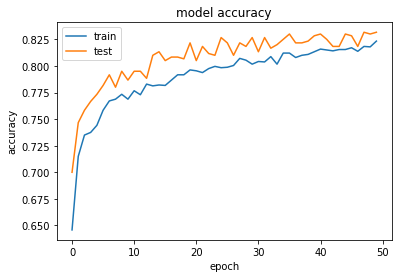

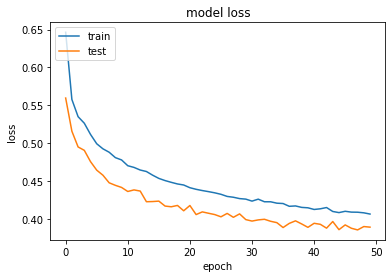

In [ ]:
from google.colab import files
ac=plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
ac.show()
#ac.savefig('acc-1.png')
#files.download('acc-1.png')

# summarize history for loss
ls=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
ls.show()
#ls.savefig('loss-1.png')
#files.download('loss-1.png')

In [ ]:
#sio.savemat('/content/drive/My Drive/SoloPaper/Covid/image_network_res.mat', {'y':out, 'X_test':X_test, 'X_train':X_train, 'y_test':y_test, 'y_train':y_train, 'acc':history.history['accuracy'], 'val_acc':history.history['val_accuracy'], 'loss':history.history['loss'], 'val_loss':history.history['val_loss']})

In [ ]:
sio.savemat('/content/drive/My Drive/SoloPaper/Covid/frog_network_res.mat', {'y':out, 'X_test':X_test, 'X_train':X_train, 'y_test':y_test, 'y_train':y_train, 'acc':history.history['accuracy'], 'val_acc':history.history['val_accuracy'], 'loss':history.history['loss'], 'val_loss':history.history['val_loss']})

Confusion matrix, without normalization
[[243  55]
 [ 46 256]]


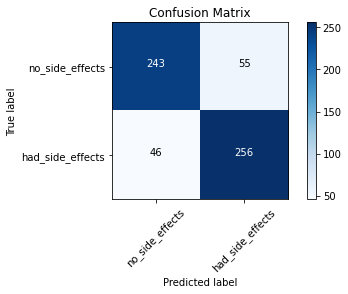

In [ ]:
def plot_confusion_matrix(cm, classes,

                        normalize=False,

                        title='Confusion matrix',

                        cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')



    print(cm)



    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

            horizontalalignment="center",

            color="white" if cm[i, j] > thresh else "black")



    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')




%matplotlib inline

from sklearn.metrics import confusion_matrix

import itertools

import matplotlib.pyplot as plt



cm_plot_labels = ['no_side_effects','had_side_effects']



cm = confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))



plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')